In [1]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

C:\Users\Conor\Anaconda3\python.exe
3.6.8 |Anaconda custom (64-bit)| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)


In [2]:
%load_ext autoreload

%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

# Load Data

In [4]:
import os.path

file_place = r"C:\Users\Conor\DataSets"

Breast_DF = pd.read_pickle(os.path.join(file_place,"Breast_mie_corrected_new"))

In [ ]:
# A
#Grade_dict = {"-": "0", "I": "1","IIa": "2","IIb": "2","IIIa": "3", "IIIb": "3"}

# B
Stage_dict = {"-": "0", "I": "1","IIa": "1","IIb": "2","IIIa": "2", "IIIb": "3"}

Stage_Q = Breast_DF.reset_index()["Stage"].map(Stage_dict)
Stage_Q.name = "Stage_Q"

Grade_Q = Breast_DF.reset_index()["Grade"].map({"-": 0, "1": 1,"2": 2,"2--3": 3,"3": 3})
Grade_Q.name = "Grade_Q"

Breast_DF.set_index(Stage_Q, append = True, inplace = True)
Breast_DF.set_index(Grade_Q, append = True, inplace = True)

import os.path

file_place = r"C:\Users\Conor\DataSets"

Breast_DF = pd.read_pickle(os.path.join(file_place,"Breast_data_raw"))

# Preprocessing

Remove blood and Necrosis from the dataset

In [ ]:
indices = (Breast_DF.reset_index().Label != "Blood") & (Breast_DF.reset_index().Label != "Necrosis") & (Breast_DF.reset_index().Label != "Non_malignant Epithelium") & (Breast_DF.reset_index().Label != "Malignant Epithelium")

Breast_DF = Breast_DF[indices.values]#.head()

In [ ]:
indices = (Breast_DF.reset_index().Label != "Blood") & (Breast_DF.reset_index().Label != "Necrosis") & ()
Breast_DF = Breast_DF[indices.values]#.head()

Get rid of spectra labelled as malignant but with no grade

In [7]:
indices = (Breast_DF.reset_index().Type == "Malignant") & (Breast_DF.reset_index().Grade == "-") 
Breast_DF = Breast_DF[indices.values == False]#.head()

Select only stroma

In [8]:
indices = (Breast_DF.reset_index().Label == "Malignant Stroma") | (Breast_DF.reset_index().Label == "Non_malignant Stroma")
Breast_DF = Breast_DF[indices.values]#.head()

drop any rows with stage 3

In [ ]:
indices = (Breast_DF.reset_index().Grade != "3")
Breast_DF = Breast_DF[indices.values]#.head()

Preprocessing method, maybe make this all one pipe?

In [9]:
Breast_DF.reset_index()["Label"].value_counts()

Malignant Stroma        70494
Non_malignant Stroma    39415
Name: Label, dtype: int64

In [11]:
Breast_DF.shape

(109909, 223)

In [143]:
from scipy.fftpack import fft

In [156]:
fft_B = fft(Breast_DF.values, axis = 1)

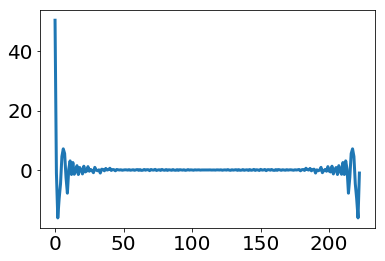

In [157]:
plt.plot(fft_B[0,:])

In [12]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA

import Tissue_Analysis_Tools as TAT

steps = [
         #("Normalise", Normalizer(norm = "l1"))
         ("RobustScaler", RobustScaler()),
         ("PCA_Denoise", TAT.denoise_PCA(n_components = 100)),
         ("StandardScale", StandardScaler())
        ]

pipe  = Pipeline(steps)

In [13]:
dataframe = TAT.process_data(Breast_DF, paraffin = (1340,1490))#, balance = "Type")

values = pipe.fit_transform(dataframe.values.T).T
values = PCA(0.99).fit_transform(values)

#Breast_DF_P = pd.DataFrame(values, index = dataframe.index, columns = dataframe.columns)
Breast_DF_P = pd.DataFrame(values, index = dataframe.index)#, columns = dataframe.columns)

Processing


C:\Users\Conor\AppData\Roaming\Python\Python36\site-packages\pandas\core\frame.py:3930: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [14]:
Breast_DF_P.head()

0   \
Sex M Type      N T Grade Label            Pathology                 Stage tnm    Age Core Stage_Q Grade_Q             
F   0 Malignant 0 2 1     Malignant Stroma Invasive ductal carcinoma IIa   T2N0M0 40  B4   1       1       -0.407100   
                                                                                                   1       -0.404825   
                                                                                                   1       -0.411145   
                                                                                                   1       -0.430934   
                                                                                                   1       -0.465448   

                                                                                                                  1   \
Sex M Type      N T Grade Label            Pathology                 Stage tnm    Age Core Stage_Q Grade_Q             
F   0 Malignant 0 2 1     Malignant Stroma Invasive ductal carcinoma IIa   T2N0M0 40  B4   1       1        0.848857   
                                                                                                   1        0.739183   
                                                                                                   1        0.639079   
                                                                                                   1        0.552774   
                                                                                                   1        0.485643   

                                                                                                                  2   \
Sex M Type      N T Grade Label            Pathology                 Stage tnm    Age Core Stage_Q Grade_Q             
F   0 Malignant 0 2 1     Malignant Stroma Invasive ductal carcinoma IIa   T2N0M0 40  B4   1       1       -0.148798   
                                                                                                   1       -0.103205   
                                                                                                   1       -0.056650   
                                                                                                   1       -0.025006   
                                                                                                   1       -0.008988   

                                                                                                                  3   \
Sex M Type      N T Grade Label            Pathology                 Stage tnm    Age Core Stage_Q Grade_Q             
F   0 Malignant 0 2 1     Malignant Stroma Invasive ductal carcinoma IIa   T2N0M0 40  B4   1       1       -0.448156   
                                                                                                   1       -0.424956   
                                                                                                   1       -0.402780   
                                                                                                   1       -0.378321   
                                                                                                   1       -0.353242   

                                                                                                                  4   \
Sex M Type      N T Grade Label            Pathology                 Stage tnm    Age Core Stage_Q Grade_Q             
F   0 Malignant 0 2 1     Malignant Stroma Invasive ductal carcinoma IIa   T2N0M0 40  B4   1       1        0.264836   
                                                                                                   1        0.317729   
                                                                                                   1        0.370768   
                                                                                                   1        0.413093   
                              

In [ ]:
fig, ax = plt.subplots(figsize = (7,5))

for name, df in Breast_DF_P.groupby("T"):
    
    ax.plot(df.mean(axis = 0, numeric_only = True), label = name)
    
ax.legend()
plt.show()    

In [ ]:
index = Breast_DF_P.reset_index()["Label"] == "Non_malignant Stroma"

In [ ]:
Breast_DF_P[index.values].reset_index()["Stage_Q"].value_counts()

In [ ]:
index = Breast_DF_P.reset_index()["Pathology"] == "Normal breast tissue (blood vessel and fibrofatty tissue)"

# Analysis

# Dataset partitioning

In [270]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

lb = LabelBinarizer()

DATA = Breast_DF_P#.sample(10000)

DATA = DATA.sample(frac = 1) # Shuffle the dataframe randomly

y_label = "N"

X = DATA
Y = DATA.reset_index()[y_label]

lb.fit(Y)

Y_b = pd.DataFrame(lb.transform(Y), index = Y.index)

while True:
    # split set by patients
    train_p, valid_p = train_test_split(np.unique(Breast_DF_P.reset_index()["Core"])
                                        , test_size = 0.1
                                        #, random_state = 42
                                        , shuffle = True)

    # Training and validation sets on patient basis
    X_train = X[X.reset_index()["Core"].isin(train_p).values]
    X_valid = X[X.reset_index()["Core"].isin(valid_p).values]

    y_train = X_train.reset_index()[y_label]
    y_valid = X_valid.reset_index()[y_label]
    
    if len(np.unique(X_train.reset_index()[y_label])) == len(np.unique(X_valid.reset_index()[y_label])): break
    
#pd.DataFrame(X_valid.values, index = y_valid.values).round(6).to_csv(r"E:\Validation.csv".format(i+1), header = None)

print("Train set: \n", y_train.value_counts(), "\n")
print("Validation set: \n", y_valid.value_counts(), "\n")

# Create dataframes containing the binary labels for each class
y_train = pd.DataFrame(lb.transform(y_train), index = y_train.index)
y_valid = pd.DataFrame(lb.transform(y_valid), index = y_valid.index)

if len(np.unique(Y)) == 2: y_train[1] = y_train[0].map({0:1, 1:0})
if len(np.unique(Y)) == 2: y_valid[1] = y_valid[0].map({0:1, 1:0})

Train set: 
 0    49599
-    36585
1     5210
2     2890
Name: N, dtype: int64 

Validation set: 
 0    10366
-     2830
1     1476
2      953
Name: N, dtype: int64 



In [271]:
index = X_train.reset_index()[y_label] == "3"
np.unique(X_train[index.values].reset_index()["Core"])

array([], dtype=float64)

In [272]:
y_label

print("Validation set: \n")

for name in np.unique(X_valid.reset_index()[y_label]):
    print(name, "\n")
    index = X_valid.reset_index()[y_label] == X_valid.reset_index()[y_label].value_counts()[name]
    index = X_valid.reset_index()[y_label] == name

    print(X_valid[index.values].reset_index()["Core"].value_counts())

Validation set: 

- 

M1    2830
Name: Core, dtype: int64
0 

J9    5397
B4    2219
J3    1614
A3    1136
Name: Core, dtype: int64
1 

J4    1476
Name: Core, dtype: int64
2 

L1    953
Name: Core, dtype: int64


In [277]:
y_label

print("Full data set: \n")

for name in np.unique(DATA.reset_index()[y_label]):
    print(name, "\n")
    index = DATA.reset_index()[y_label] == DATA.reset_index()[y_label].value_counts()[name]
    index = DATA.reset_index()[y_label] == name

    print(DATA[index.values].reset_index()["Core"].value_counts())

Full data set: 

- 

M4     4580
M3     4324
M12    4018
M8     3542
M9     3344
M14    3243
M10    3114
M15    3100
M7     2984
M1     2830
M11    2735
M16    1348
M2      253
Name: Core, dtype: int64
0 

J9     5397
K6     2581
B6     2498
B4     2219
F15    2151
A7     2013
J14    1930
G5     1921
F12    1888
A6     1823
E13    1760
D7     1726
J3     1614
H3     1600
A1     1574
D13    1564
J13    1562
D15    1458
K5     1441
J6     1426
L2     1417
B5     1370
F6     1237
A9     1219
B11    1203
E6     1193
L3     1143
A3     1136
B15    1120
J11    1030
A8     1027
E4      998
B10     830
B1      743
B14     697
A4      695
K7      549
J1      516
K1      434
B7      412
B2      308
A11     285
A2      257
Name: Core, dtype: int64
1 

B16    1499
J4     1476
F9     1064
J5     1042
J16     742
J15     663
D14     200
Name: Core, dtype: int64
2 

E5    1125
E3     961
L1     953
J7     804
Name: Core, dtype: int64


In [278]:
y_label

print("Train set: \n")

for name in np.unique(X_train.reset_index()[y_label]):
    print(name, "\n")
    index = X_train.reset_index()[y_label] == X_train.reset_index()[y_label].value_counts()[name]
    index = X_train.reset_index()[y_label] == name

    print(X_train[index.values].reset_index()["Core"].value_counts())

Train set: 

- 

M4     4580
M3     4324
M12    4018
M8     3542
M9     3344
M14    3243
M10    3114
M15    3100
M7     2984
M11    2735
M16    1348
M2      253
Name: Core, dtype: int64
0 

K6     2581
B6     2498
F15    2151
A7     2013
J14    1930
G5     1921
F12    1888
A6     1823
E13    1760
D7     1726
H3     1600
A1     1574
D13    1564
J13    1562
D15    1458
K5     1441
J6     1426
L2     1417
B5     1370
F6     1237
A9     1219
B11    1203
E6     1193
L3     1143
B15    1120
J11    1030
A8     1027
E4      998
B10     830
B1      743
B14     697
A4      695
K7      549
J1      516
K1      434
B7      412
B2      308
A11     285
A2      257
Name: Core, dtype: int64
1 

B16    1499
F9     1064
J5     1042
J16     742
J15     663
D14     200
Name: Core, dtype: int64
2 

E5    1125
E3     961
J7     804
Name: Core, dtype: int64


In [280]:
index = X_train.reset_index().Stage == X_train.reset_index().Stage.value_counts().idxmin()

print(len(X_train[index.values].reset_index()["Core"].value_counts()))

3


# HyperOpt Training - XGBoost

In [25]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

This will ouput a score for the current hyperparameter configuration 

In [ ]:
def single_group_split(X,y, grouping):
    
    joint = pd.concat([grouping, y], axis = 1)
    
    groups =  joint.groupby(y.name)

    splits = []

    for name, y_id in groups:
        
        splits.append(np.unique(y_id.Core)[:len(np.unique(y_id.Core))//2])
        splits.append(np.unique(y_id.Core)[len(np.unique(y_id.Core))//2:])
        
    print(splits)

    #return [[splits[0], splits[2]],[splits[1], splits[3]]]
    

In [ ]:
pd.concat([X_train.reset_index()["Core"], y_train[4]], axis = 1).groupby(4)

In [ ]:
single_group_split(X_train.values, y_train[3], X_train.reset_index()["Core"])

In [ ]:
dir(pd.concat([groups, y_temp], axis = 1).groupby("Core"))

In [291]:
from sklearn.metrics import f1_score, confusion_matrix

def j_xg_bin(y_predicted, dtrain_true, thresh = 0.6):
    
    y_true = dtrain_true.get_label().astype(int)
    
    bin_preds = [1 if pred > thresh else 0 for pred in y_predicted]

    tn, fp, fn, tp = confusion_matrix(y_true, bin_preds).ravel()
    
    sens = tp/(tp+fn)
    spec = tn/(tn+fp)
    j = sens + spec - 1
        
    return "J", 1-j # Return inverse as this score will be minimised

def j_normal_bin(y_true, y_pred, thresh = 0.6):
    
    bin_preds = [1 if pred > thresh else 0 for pred in y_pred]
    
    tn, fp, fn, tp = confusion_matrix(y_true, bin_preds).ravel()
    
    sens = tp/(tp+fn)
    spec = tn/(tn+fp)
    j = sens + spec - 1
    
    return j

In [296]:
import xgboost as xgb

def hyper_opt_search_XGBoost(X, y, grouping, weight_binary = False
                             , optimiser = tpe.suggest, random_state = 42
                             , cores = 1, n_evals = 3, k_splits = 2):
    
    from sklearn.model_selection import train_test_split, GroupKFold, LeaveOneGroupOut, StratifiedKFold
    from sklearn.metrics import roc_auc_score
    
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    def score(params):
        
        loss_cv = []
        scores = []
        
        i = 0

        for train_index, test_index in GroupKFold(k_splits).split(X, y, grouping):

            # Uncomment to save folds
            #X_Data = np.vstack([X[train_index], X[test_index]])
            #Y_Data = lb.inverse_transform(np.hstack([y[train_index], y[test_index]]))
            #pd.DataFrame(X_Data, index=Y_Data).round(6).to_csv(r"F:\fold_{}.csv".format(i+1), header = None)
            
            dtrain = xgb.DMatrix(X[train_index], label=y[train_index])
            dtest = xgb.DMatrix(X[test_index], label=y[test_index])

            watchlist = [(dtest, 'eval'), (dtrain, 'train')]

            xgb_cl = xgb.train(params, dtrain, evals=watchlist, verbose_eval=False, feval=j_xg_bin)

            predictions = xgb_cl.predict(dtest, ntree_limit = xgb_cl.best_iteration + 1)

            # TODO: try and get the y_labels from dtest
            #score = roc_auc_score(y[test_index], predictions)
            score = j_normal_bin(y[test_index], predictions)
            scores.append(score)
            
            loss = 1 - score
            
            loss_cv.append(loss)
            
        #print("\tScore {0}\n\n".format(1-loss))
        return {'loss': loss.mean(), 'status': STATUS_OK, 'scores': scores}
    
    space = {
        "colsample_bylevel" : hp.quniform('colsample_bylevel', 0.1,1,0.05),
        "n_classes" : 2,
        "scale_pos_weight" : 1/(np.sum(y)/y.shape[0]),
        'n_estimators': hp.quniform('n_estimators', 10, 1000, 1),
        'learning_rate': hp.quniform('learning_rate', 0.025, 0.7, 0.025),
        # A problem with max_depth casted to float instead of int with
        # the hp.quniform method.
        'max_depth':  hp.choice('max_depth', np.arange(3, 15, dtype=int)),
        'min_child_weight': hp.quniform('min_child_weight', 1, 8, 1),
        'subsample': hp.quniform('subsample', 0.3, 1, 0.05),
        'gamma': hp.quniform('gamma', 0.3, 1, 0.05),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 0.95, 0.05),
        #'eval_metric': 'auc',
        #'eval_metric': j_normal_bin,
        'objective': 'binary:logistic',
        # Increase this number if you have more cores. Otherwise, remove it and it will default 
        # to the maxium number. 
        'nthread': cores,
        'booster': 'gbtree',
        'tree_method': 'exact',
        'silent': 1,
        'seed': random_state      
    }

    # Use the fmin function from Hyperopt to find the best hyperparameters
    best = fmin(score, space, algo=tpe.suggest, 
                # trials=trials, 
                max_evals=n_evals)
    
    best["scale_pos_weight"] = space["scale_pos_weight"]
    best["n_estimators"] = int(best["n_estimators"])

    return best

from sklearn.model_selection import KFold

grouping = X_train.reset_index()["Core"]

indices = []

i = 0

for train_index, test_index in KFold(5).split(grouping):
    
    indices.append(train_index)

    # Uncomment to save folds
    X_Data = np.vstack(X_train.values[test_index])
    Y_Data = lb.inverse_transform(np.hstack(y_train[0][test_index]))
    output = pd.DataFrame(X_Data, index=Y_Data)
    output.round(6).to_csv(r"F:\fold_{}.csv".format(i+1), header = None)
    
    print(output.index.value_counts())

    i = i+1

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

y = DATA.reset_index()["N"]

lda = LinearDiscriminantAnalysis(n_components = 2).fit_transform(DATA.values, y)

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(figsize = (20,20))

sns.scatterplot(x = lda[:,0], y = lda[:,1], hue = DATA.reset_index()["T"], ax = axes, style = DATA.reset_index()["Stage"], alpha = 1)

In [276]:
DATA.head()

0   \
Sex M Type      N T Grade Label                Pathology                                          Stage tnm    Age Core Stage_Q Grade_Q             
F   0 Malignant 0 2 2     Malignant Stroma     Invasive ductal carcinoma                          IIa   T2N0M0 36  K5   1       2       -0.341912   
    - Normal    - - -     Non_malignant Stroma Normal breast tissue (blood vessel and fibrofat... -     -      19  M14  0       0       -0.157995   
    0 Malignant 1 3 2     Malignant Stroma     Invasive ductal carcinoma                          IIIa  T3N1M0 50  J4   2       2        0.957775   
                0 1 2     Malignant Stroma     Invasive ductal carcinoma                          I     T1N0M0 47  F6   1       2       -0.119613   
                  2 2     Malignant Stroma     Invasive ductal carcinoma                          IIa   T2N0M0 45  J6   1       2       -0.547605   

                                                                                                                                               1   \
Sex M Type      N T Grade Label                Pathology                                          Stage tnm    Age Core Stage_Q Grade_Q             
F   0 Malignant 0 2 2     Malignant Stroma     Invasive ductal carcinoma                          IIa   T2N0M0 36  K5   1       2        0.308253   
    - Normal    - - -     Non_malignant Stroma Normal breast tissue (blood vessel and fibrofat... -     -      19  M14  0       0       -0.299734   
    0 Malignant 1 3 2     Malignant Stroma     Invasive ductal carcinoma                          IIIa  T3N1M0 50  J4   2       2        0.256898   
                0 1 2     Malignant Stroma     Invasive ductal carcinoma                          I     T1N0M0 47  F6   1       2        0.319548   
                  2 2     Malignant Stroma     Invasive ductal carcinoma                          IIa   T2N0M0 45  J6   1       2        0.473415   

                                                                                                                                               2   \
Sex M Type      N T Grade Label                Pathology                                          Stage tnm    Age Core Stage_Q Grade_Q             
F   0 Malignant 0 2 2     Malignant Stroma     Invasive ductal carcinoma                          IIa   T2N0M0 36  K5   1       2       -0.153877   
    - Normal    - - -     Non_malignant Stroma Normal breast tissue (blood vessel and fibrofat... -     -      19  M14  0       0       -0.073256   
    0 Malignant 1 3 2     Malignant Stroma     Invasive ductal carcinoma                          IIIa  T3N1M0 50  J4   2       2       -0.025374   
                0 1 2     Malignant Stroma     Invasive ductal carcinoma                          I     T1N0M0 47  F6   1       2       -0.398130   
                  2 2     Malignant Stroma     Invasive ductal carcinoma                          IIa   T2N0M0 45  J6   1       2       -0.023342   

                                                                                                                                               3   \
Sex M Type      N T Grade Label                Pathology                                          Stage tnm    Age Core Stage_Q Grade_Q             
F   0 Malignant 0 2 2     Malignant Stroma     Invasive ductal carcinoma                          IIa   T2N0M0 36  K5   1       2       -0.200158   
    - Normal    - - -     Non_malignant Stroma Normal breast tissue (blood vessel and fibrofat... -     -      19  M14  0       0        0.105708   
    0 Malignant 1 3 2     Malignant Stroma     Invasive ductal carcinoma                          IIIa  T3N1M0 50  J4   2       2       -0.201696   
                0 1 2     Malignant Stroma     Invasive ductal carcinoma                          I     T1N0M0 47  F6   1       2       -0.125386   
                  2 2     Malignant Stroma     Invasive ductal carcinoma                          IIa   T2N0M0 45  J6

In [299]:
Y_train.shape

NameError: name 'Y_train' is not defined

In [298]:
%time
from sklearn.model_selection import train_test_split, GroupKFold, LeaveOneGroupOut

xgbinary_classifiers = dict()
classifier_results = dict()

for i, name in enumerate(np.unique(Y)):
    
    #if i != 4: continue
    
    print("\n{}: {}".format(i + 1, name))
    
    best_hyperparams = hyper_opt_search_XGBoost(X_train.values,
                                        y_train[i].values,
                                        X_train.reset_index()["Core"],
                                        weight_binary = True,
                                        optimiser = tpe.suggest,
                                        random_state = 42,
                                        cores = 4,
                                        n_evals = 2,
                                        k_splits = 2)
                                #, trials = Trials())
    
    ## TODO: append best classifier to dictionary, store any other
    ## relevant variables with it using trials.
    clf_xgb = xgb.XGBClassifier(n_jobs = -1)
    
    # Set the parameters which are best for that particular class
    clf_xgb.set_params(**best_hyperparams)
    clf_xgb.fit(X_train.values, y_train[i])

    xgbinary_classifiers[name] = clf_xgb
    
classifier_results["XGB"] = xgbinary_classifiers

Wall time: 0 ns

1: -
100%|████████████████████████████████████████████████████| 2/2 [00:12<00:00,  6.26s/it, best loss: 0.35704862201594234]

2: 0
100%|██████████████████████████████████████████████████████| 2/2 [00:13<00:00,  6.40s/it, best loss: 0.606436792414561]

3: 1
100%|█████████████████████████████████████████████████████| 2/2 [00:11<00:00,  5.62s/it, best loss: 0.9731804315307888]

4: 2
100%|█████████████████████████████████████████████████████| 2/2 [00:12<00:00,  6.09s/it, best loss: 0.9861046330845771]


In [29]:
from sklearn.metrics import confusion_matrix, roc_auc_score

# Results

In [300]:
probs = TAT.bin_predict(X_valid.values, xgbinary_classifiers)

aucs = pd.Series({class_name: roc_auc_score(y_valid.iloc[:,i], probs.iloc[:,i]) for i, class_name in enumerate(probs.columns)}, name = "AUC")

results_xgb = pd.DataFrame(TAT.sens_spec_etc(lb.inverse_transform(y_valid.values), probs.idxmax(axis = 1))).append(aucs)#, ignore_index = True)

In [ ]:
import datetime, os

d = datetime.datetime.now().strftime("%d_%m_%Y_%H.%M")

save_place = r"C:\Users\Conor\Google Drive\PhD\Breast_Cancer_Analysis_April\Results"
results_xgb.to_csv(os.path.join(save_place, "XGBoost_{}_.csv".format(d)))

In [104]:
X_valid.reset_index()["T"].value_counts()

-    7668
2    3338
3    1476
4     434
1     285
Name: T, dtype: int64

In [301]:
results_xgb

,-,0,1,2
F1,0.577975,0.808698,0.105142,0.030169
FN,938.000000,1533.000000,1385.000000,936.000000
FP,1825.000000,2646.000000,164.000000,157.000000
J,0.525917,0.348975,0.050062,0.007138
Sensitivity,0.668551,0.852113,0.061653,0.017838
Specficity,0.857366,0.496863,0.988409,0.989299
TN,10970.000000,2613.000000,13985.000000,14515.000000
TP,1892.000000,8833.000000,91.000000,17.000000
AUC,0.848982,0.703902,0.745370,0.536170


In [ ]:
import itertools

def conf_mat_analyse(conf_mat, column_title, labels):
    
    stats = dict()
    stats = []
    
    n_classes = conf_mat.shape[0]
    
    for i, name in enumerate(labels):
        #todo add assert statement to ensure at least 1 example of each class

        TP = conf_mat[i,i]
        FP = np.sum(conf_mat[:,i]) - TP
        FN = np.sum(conf_mat[i,:]) - TP
        TN = np.sum(conf_mat) - TP - FP - FN

        stats.append([name,TP,TN,FP,FN])
        
    df = pd.DataFrame(stats, columns = [column_title,"TP","TN","FP","FN"])
    
    df["Acc"] = df.apply(lambda row: (row["TP"] + row["TN"])/(row["TP"] + row["TN"] + row["FP"] + row["FN"])*100, axis = 1)

    try: df["Sens"] = df.apply(lambda row: row["TP"]/(row["TP"] + row["FN"])*100, axis = 1)
        
    except: df["Sens"] = np.nan # Outputs NaN where there are no positive cases
        
    df["Spec"] = df.apply(lambda row: row["TN"]/(row["TN"] + row["FP"])*100, axis = 1)
    
    return df

In [ ]:
lb.inverse_transform(y_valid.values)

In [35]:
import matplotlib as mpl

print(mpl.get_configdir())
plt.style.reload_library()
plt.style.use('ScanCan_Style')

C:\Users\Conor\.matplotlib


C:\Users\Conor\Anaconda3\lib\site-packages\xgboost\sklearn.py:465: RuntimeWarning: invalid value encountered in true_divide
  return all_features / all_features.sum()


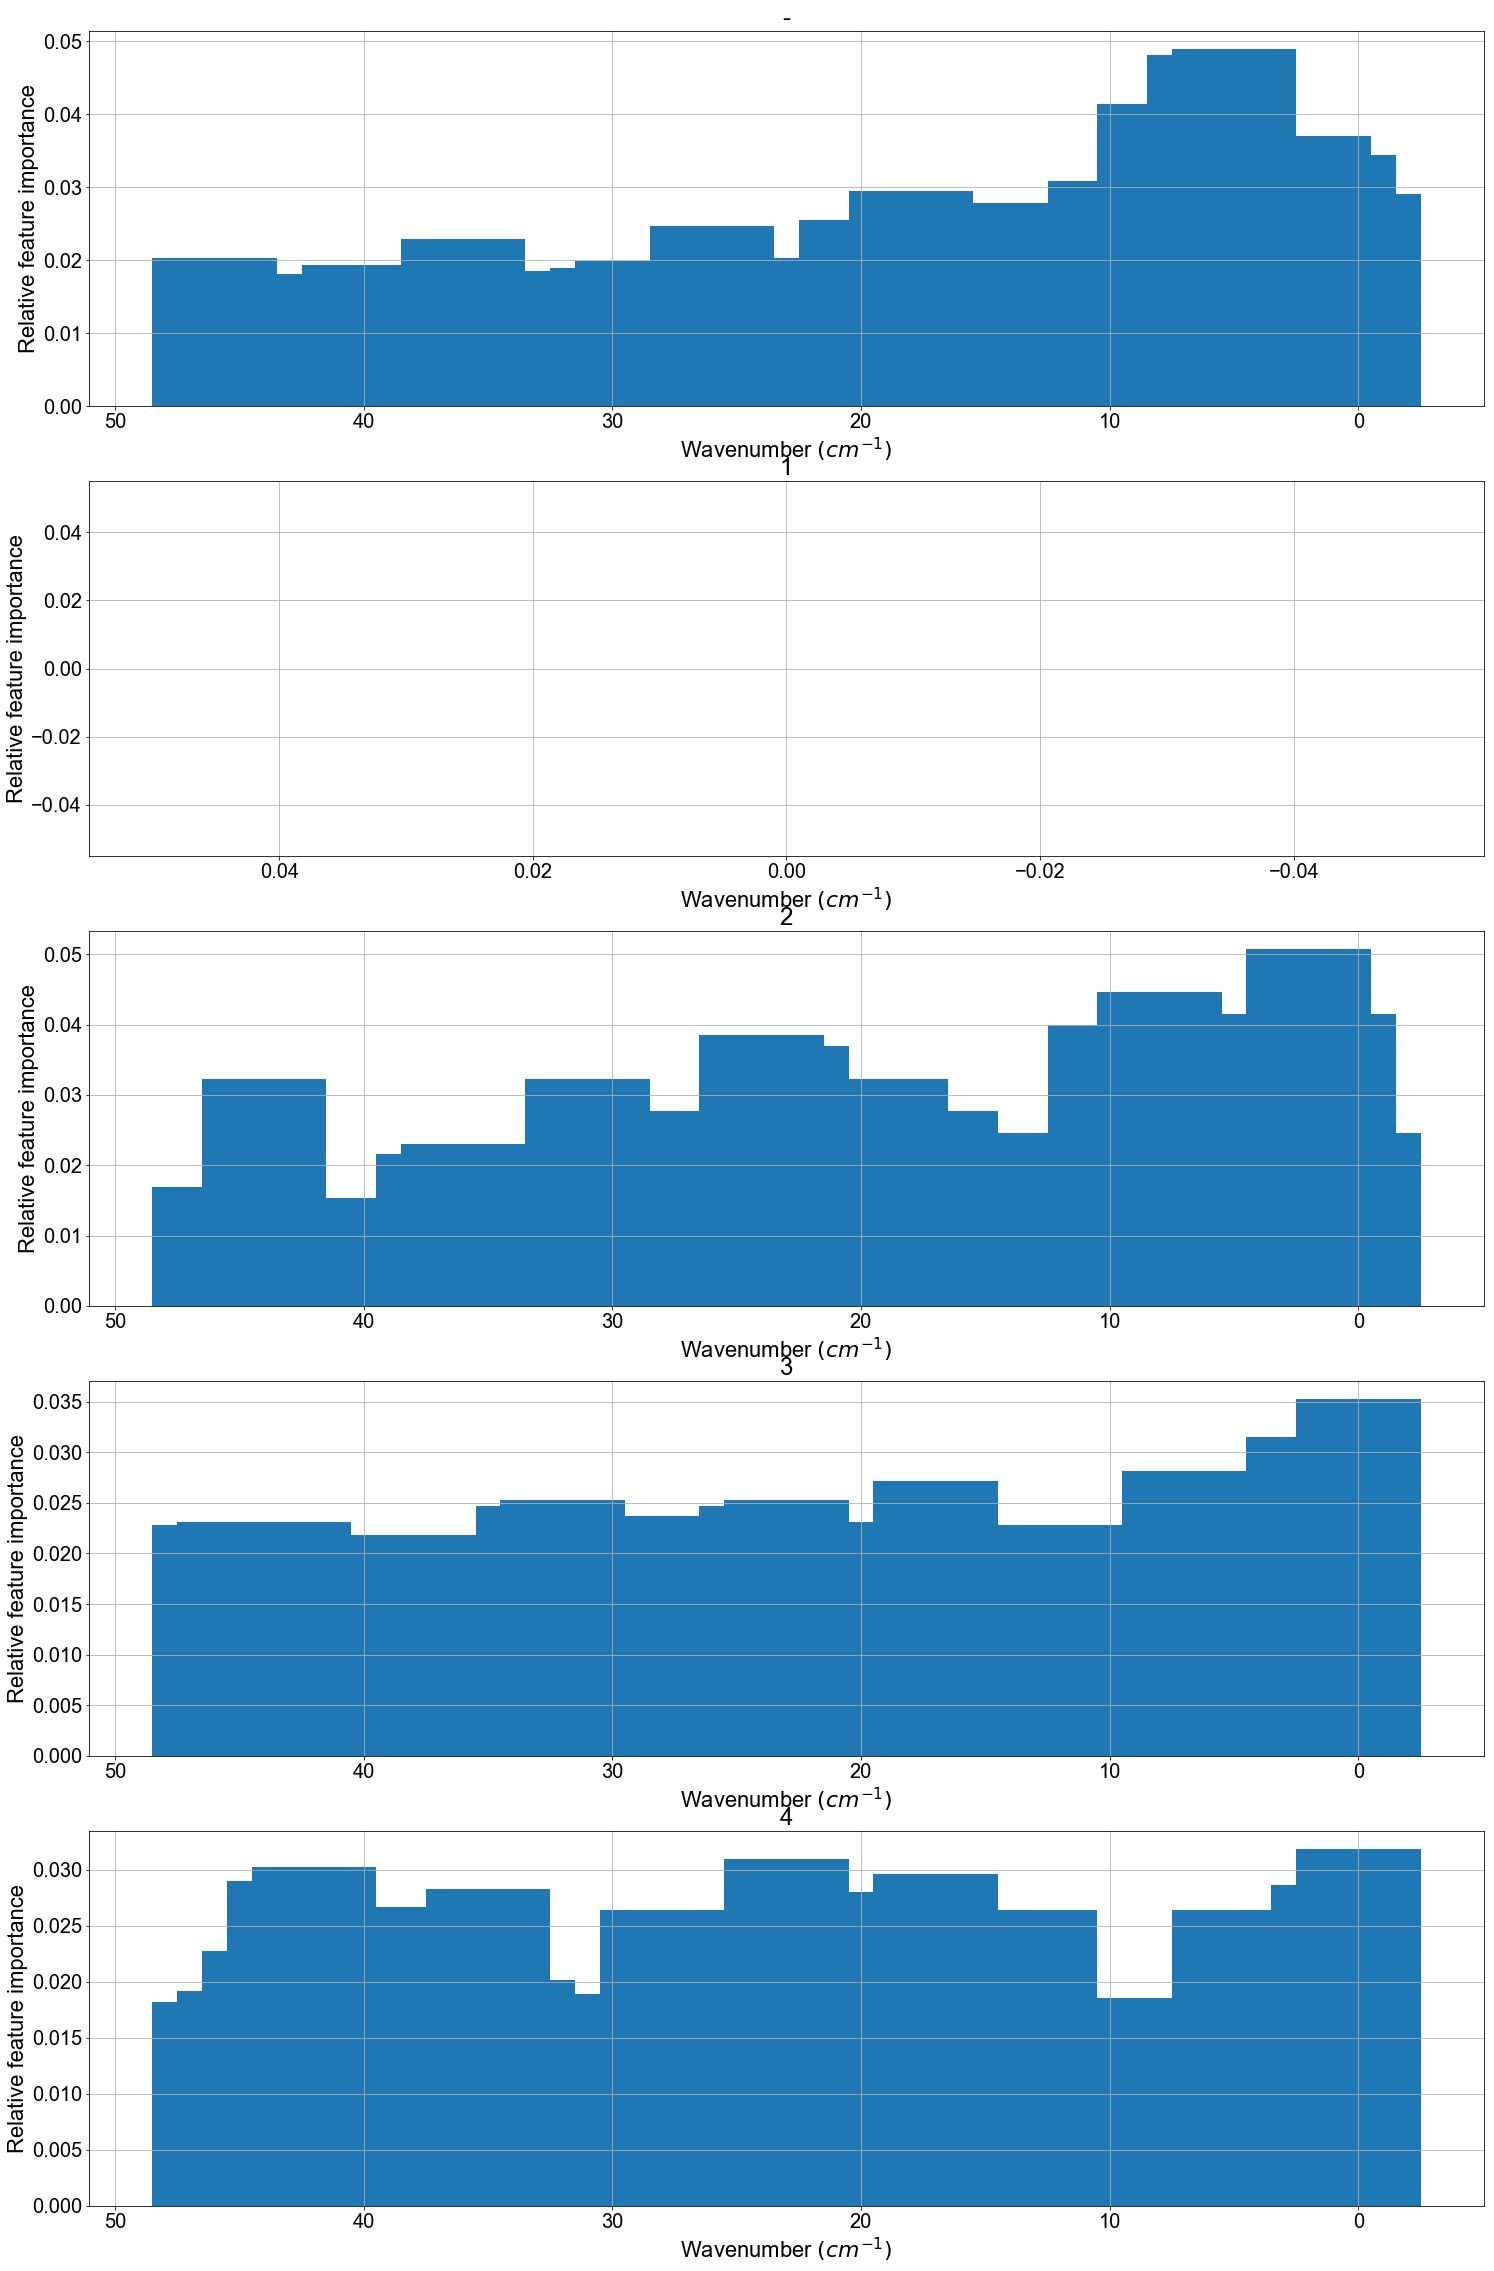

In [36]:
fig, axes = plt.subplots(nrows = len(xgbinary_classifiers), ncols = 1, figsize = (25,len(xgbinary_classifiers)*8))

#fig.suptitle("Relative wavenumber importances", fontsize = 16)

for title, plot, ax in zip(xgbinary_classifiers.keys(), xgbinary_classifiers.values(), axes.flatten()):
    
    ax.grid()
    ax.bar(X.columns, plot.feature_importances_, width = 5)
    #ax.set_xlim(min(X.columns), max(X.columns))
    ax.set_title(title)
    ax.invert_xaxis()
    ax.set_xlabel("Wavenumber $(cm^{-1})$")
    ax.set_ylabel("Relative feature importance")
    
plt.show()
fig.savefig(r"C:\Users\Conor\Google Drive\PhD\Breast_Cancer_Analysis_April\Feature_Importances_XGBoost.svg"
           ,format = "svg"
           ,bbox_inches = "tight")

# Hyperopt on other classifiers

In [302]:
def hyper_opt_search(clf, space, X, y, grouping, optimiser = tpe.suggest, random_state = 42, cores = 2, n_evals = 3, n_splits = 3):

    from sklearn.model_selection import train_test_split, GroupKFold
    from sklearn.metrics import roc_auc_score, confusion_matrix
    
    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    def score(params):
        
        loss_cv = []
        
        for train_index, test_index in GroupKFold(n_splits).split(X, y, grouping):

            X_train, Y_train = X[train_index], y[train_index]
            X_test, Y_test = X[test_index], y[test_index]
            
            clf.fit(X_train, Y_train)

            predictions = clf.predict_proba(X_test)
            
            #score = roc_auc_score(y[test_index], predictions[:,1])
            score = j_normal(y[test_index], predictions[:,1])

            loss = 1 - score
            
            loss_cv.append(loss)
            
        #print("\tScore {0}\n\n".format(1-loss))
        return {'loss': loss.mean(), 'status': STATUS_OK}
    
    # Use the fmin function from Hyperopt to find the best hyperparameters
    best = fmin(score, space, algo=tpe.suggest, 
                # trials=trials, 
                max_evals=n_evals)
    return best

In [121]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

classifiers = {
    "SVM": (SVC(probability = True, kernel = "rbf", class_weight = "balanced"), 
            {'C': hp.loguniform("C", np.log(1e-2), np.log(1e2))
            ,"gamma" : hp.loguniform("gamma", np.log(1e-2), np.log(1e2))
            })
    
    ,"KNN": (KNeighborsClassifier(),
            {'n_neighbors': hp.choice('n_neighbors', np.arange(2, 30, dtype=int))
            ,'leaf_size': hp.choice('leaf_size', np.arange(10,60, dtype = int))
            ,'n_jobs': -1})
    
    ,"RF": (RandomForestClassifier(),
            {'n_estimators ': hp.choice('n_estimators', np.arange(10,1000,5))
            ,'max_depth': hp.choice('max_depth', np.arange(2,30,1))
            ,'min_samples_split': hp.quniform('min_samples_split', 0.3, 1, 0.05)})
    
    ,"LDA": (LinearDiscriminantAnalysis(solver = "lsqr"),
            {'eigen': hp.choice('shrinkage', [None, "auto"])})
    
    ,"LR": (LogisticRegression(class_weight = "balanced", n_jobs = 1, solver = "liblinear"),
            {'C': hp.loguniform("C", np.log(1e-5), np.log(1e5))})
}

In [303]:
%time
from sklearn.model_selection import train_test_split, GroupKFold
from sklearn.base import clone

# Dictionary to store the best classifier after optimisation

for clf_name, clf_u, params in zip(classifiers.keys(), list(zip(*classifiers.values()))[0], list(zip(*classifiers.values()))[1]):

    # Dictionary to store the binary classifier for each class
    binary_classifiers = dict()
    
    if clf_name in ["KNN", "RF", "SVM"] : continue
    
    if clf_name in ["LDA","SVM"]: n_evals = 3
    else: n_evals = 20
        
    print(clf_name)

    for i, name in enumerate(np.unique(Y)):
        
        clf = clone(clf_u)
        print("\n{}".format(name))

        best_hyperparams = hyper_opt_search(clf,
                                            params,
                                            X_train.values,
                                            y_train[i].values,
                                            X_train.reset_index()["Core"],
                                            optimiser = tpe.suggest,
                                            random_state = 42,
                                            cores = -1,
                                            n_evals = n_evals,
                                            n_splits = 2)

        ## TODO: append best classifier to dictionary, store any other
        ## relevant variables with it. Use trials.

        # Set the parameters which are best for that particular class
        clf = clf.set_params(**best_hyperparams)
        
        clf.fit(X_train.values, y_train[i])
        
        binary_classifiers[name] = clf
        
    classifier_results[clf_name] = binary_classifiers

Wall time: 0 ns
LDA

-
  0%|                                                                              | 0/3 [00:00<?, ?it/s, best loss: ?]


NameError: name 'j_normal' is not defined

In [69]:
classifier_results.keys()

dict_keys(['XGB'])

In [138]:
clf = "SVM"

o_probs = TAT.bin_predict(X_valid.values, classifier_results[clf])

aucs = pd.Series({class_name: roc_auc_score(y_valid.iloc[:,i], o_probs.iloc[:,i]) for i, class_name in enumerate(o_probs.columns)}, name = "AUC")

results = pd.DataFrame(TAT.sens_spec_etc(lb.inverse_transform(y_valid.values), o_probs.idxmax(axis = 1))).append(aucs)#, ignore_index = True)

In [125]:
results

,-,1,2,3,4
F1,0.870041,0.020779,0.425667,0.000000,0.000000
FN,1154.000000,265.000000,1935.000000,1476.000000,434.000000
FP,792.000000,1620.000000,1851.000000,198.000000,803.000000
J,0.706363,-0.055250,0.232640,-0.016887,-0.062897
Sensitivity,0.849504,0.070175,0.420312,0.000000,0.000000
Specficity,0.856859,0.874574,0.812329,0.983113,0.937103
TN,4741.000000,11296.000000,8012.000000,11527.000000,11964.000000
TP,6514.000000,20.000000,1403.000000,0.000000,0.000000
AUC,0.934383,0.804267,0.708363,0.173995,0.627624


In [127]:
results

,-,1,2,3,4
F1,0.903667,0.000000,0.490270,0.000000,0.066406
FN,867.000000,285.000000,1587.000000,1476.000000,417.000000
FP,583.000000,1931.000000,2054.000000,3.000000,61.000000
J,0.781565,-0.149504,0.316313,-0.000256,0.034393
Sensitivity,0.886933,0.000000,0.524566,0.000000,0.039171
Specficity,0.894632,0.850496,0.791747,0.999744,0.995222
TN,4950.000000,10985.000000,7809.000000,11722.000000,12706.000000
TP,6801.000000,0.000000,1751.000000,0.000000,17.000000
AUC,0.936405,0.599556,0.728096,0.628018,0.930732


In [129]:
results

,-,1,2,3,4
F1,0.897262,0.044064,0.541321,0.013564,0.000000
FN,917.000000,267.000000,1052.000000,1465.000000,434.000000
FP,629.000000,514.000000,2822.000000,135.000000,35.000000
J,0.766731,0.023362,0.398721,-0.004061,-0.002741
Sensitivity,0.880412,0.063158,0.684841,0.007453,0.000000
Specficity,0.886318,0.960204,0.713880,0.988486,0.997259
TN,4904.000000,12402.000000,7041.000000,11590.000000,12732.000000
TP,6751.000000,18.000000,2286.000000,11.000000,0.000000
AUC,0.924717,0.577812,0.723134,0.708986,0.730898


In [131]:
results

,-,1,2,3,4
F1,0.883677,0.014311,0.491043,0.005230,0.000000
FN,641.000000,281.000000,1474.000000,1471.000000,434.000000
FP,1209.000000,270.000000,2390.000000,431.000000,1.000000
J,0.697899,-0.006869,0.316098,-0.033372,-0.000078
Sensitivity,0.916406,0.014035,0.558418,0.003388,0.000000
Specficity,0.781493,0.979096,0.757680,0.963241,0.999922
TN,4324.000000,12646.000000,7473.000000,11294.000000,12766.000000
TP,7027.000000,4.000000,1864.000000,5.000000,0.000000
AUC,0.925257,0.751809,0.652107,0.534097,0.613734


In [139]:
import datetime, os

d = datetime.datetime.now().strftime("%d_%m_%Y_%H.%M")

save_place = r"C:\Users\Conor\Google Drive\PhD\Breast_Cancer_Analysis_April\Results"
results.to_csv(os.path.join(save_place, "{}_{}_StageB.csv".format(clf, d)))

In [63]:
classifier_results

{'LDA': {'-': LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=1,
                solver='lsqr', store_covariance=False, tol=0.0001),
  '1': LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=1,
                solver='lsqr', store_covariance=False, tol=0.0001),
  '2': LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=1,
                solver='lsqr', store_covariance=False, tol=0.0001),
  '3': LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0,
                solver='lsqr', store_covariance=False, tol=0.0001),
  '4': LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=0,
                solver='lsqr', store_covariance=False, tol=0.0001)},
 'LR': {'-': LogisticRegression(C=372.23253096547654, class_weight='balanced', dual=False,
            fit_intercept=True, intercept_scaling=1, max_iter=100,
            multi_class='warn', n_jobs=1, penalty='l2', random_state=None,
            solver='libl

In [86]:
preds = pd.concat({name: TAT.bin_predict(X_valid.values, clf).idxmax(axis = 1) for name, clf in classifier_results.items()})

In [89]:
preds = {name: TAT.bin_predict(X_valid.values, clf).idxmax(axis = 1).values for name, clf in classifier_results.items()}

In [91]:
np.concatenate(preds.values())

TypeError: The first input argument needs to be a sequence

# Ensemble Classifier

In [158]:
classifier_results

{'XGB': {'-': XGBClassifier(base_score=0.5, booster='gbtree',
         colsample_bylevel=0.6000000000000001, colsample_bytree=0.5,
         gamma=0.7000000000000001, learning_rate=0.42500000000000004,
         max_delta_step=0, max_depth=0, min_child_weight=8.0, missing=None,
         n_estimators=829, n_jobs=-1, nthread=None,
         objective='binary:logistic', random_state=0, reg_alpha=0,
         reg_lambda=1, scale_pos_weight=3.046209090622736, seed=None,
         silent=True, subsample=0.55),
  '1': XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.25,
         colsample_bytree=0.7000000000000001, gamma=0.55,
         learning_rate=0.525, max_delta_step=0, max_depth=11,
         min_child_weight=5.0, missing=None, n_estimators=209, n_jobs=-1,
         nthread=None, objective='binary:logistic', random_state=0,
         reg_alpha=0, reg_lambda=1, scale_pos_weight=9.908606557377048,
         seed=None, silent=True, subsample=0.75),
  '2': XGBClassifier(base_score=

In [225]:
votes = {clf_name: pd.DataFrame(TAT.bin_predict(X_valid.values, clf)) for clf_name, clf in classifier_results.items()}

In [226]:
weighted = np.tensordot(np.stack([df.values for df in votes.values()], axis = 2), np.array([0.1,0.2,0.3,0.4]), axes = ([2,0]))

In [230]:
probs = pd.DataFrame(weighted, columns = pd.concat(votes).columns)

In [254]:
for _ in range(10):
    
    weights = np.random.rand(4)
    weights = weights/sum(weights)
    
    probs = TAT.ensemble_prob_predict(X_valid, classifier_results, weights = weights)
    
    aucs = pd.Series({class_name: roc_auc_score(y_valid.iloc[:,i], probs.iloc[:,i]) for i, class_name in enumerate(o_probs.columns)}, name = "AUC")

    results = pd.DataFrame(TAT.sens_spec_etc(lb.inverse_transform(y_valid.values), probs.idxmax(axis = 1))).append(aucs)
    
    print(weights, results.loc["F1"].sum())

[0.23681337 0.27710922 0.1744575  0.31161991] 1.5286305524072998
[0.28098134 0.22119876 0.33755004 0.16026985] 1.5094837845404245
[0.3394989  0.39909917 0.25172632 0.00967561] 1.4784100275527274
[0.20712785 0.29080531 0.20444113 0.29762571] 1.526260909912092
[0.26887121 0.19910851 0.223297   0.30872328] 1.538458204298367
[0.47987598 0.23729292 0.10339531 0.17943579] 1.5205604971055995
[0.09552321 0.1385311  0.39621965 0.36972604] 1.5257634773963735
[0.27945258 0.03032387 0.33382715 0.3563964 ] 1.5321272653381486
[0.24881787 0.02651992 0.60207847 0.12258374] 1.51225352871529
[0.07188732 0.27183001 0.33462992 0.32165274] 1.524482378695152


In [243]:
clf = "SVM"

#o_probs = TAT.bin_predict(X_valid.values, classifier_results[clf])

aucs = pd.Series({class_name: roc_auc_score(y_valid.iloc[:,i], probs.iloc[:,i]) for i, class_name in enumerate(o_probs.columns)}, name = "AUC")

results = pd.DataFrame(TAT.sens_spec_etc(lb.inverse_transform(y_valid.values), probs.idxmax(axis = 1))).append(aucs)#, ignore_index = True)

In [268]:
clf = "SVM"

probs = TAT.ensemble_prob_predict(X_valid, classifier_results, weights = [0.26887121, 0.19910851, 0.223297, 0.30872328])

aucs = pd.Series({class_name: roc_auc_score(y_valid.iloc[:,i], probs.iloc[:,i]) for i, class_name in enumerate(o_probs.columns)}, name = "AUC")

results = pd.DataFrame(TAT.sens_spec_etc(lb.inverse_transform(y_valid.values), probs.idxmax(axis = 1))).append(aucs)#, ignore_index = True)

In [269]:
results

,-,1,2,3,4
F1,0.928341,0.031073,0.579044,0.000000,0.000000
FN,478.000000,274.000000,970.000000,1476.000000,434.000000
FP,632.000000,412.000000,2473.000000,111.000000,4.000000
J,0.823439,0.006698,0.458672,-0.009467,-0.000313
Sensitivity,0.937663,0.038596,0.709407,0.000000,0.000000
Specficity,0.885776,0.968102,0.749265,0.990533,0.999687
TN,4901.000000,12504.000000,7390.000000,11614.000000,12763.000000
TP,7190.000000,11.000000,2368.000000,0.000000,0.000000
AUC,0.938384,0.746387,0.738484,0.431334,0.866067


In [ ]:
def plot_importances(bin_classifiers, n_best = None):

    fig, axes = plt.subplots(nrows = len(bin_classifiers), ncols = 1, figsize = (25,len(bin_classifiers)*8))

    #fig.suptitle("Relative wavenumber importances", fontsize = 16)

    for title, clf, ax in zip(bin_classifiers.keys(), bin_classifiers.values(), axes.flatten()):

        importances = pd.Series(abs(clf.coef_.reshape(164)), index = X_train.columns)

        if n_best != None:
            importances = importances.sort_values().iloc[:n_best]

        ax.grid()
        ax.bar(importances.index, importances.values, width = 5)

        ticks = np.arange(min(X_train.columns), max(X_train.columns), 100)
        ax.set_xlim(min(X.columns), max(X.columns))
        ax.set_title(title)
        ax.invert_xaxis()
        ax.set_xlabel("Wavenumber $(cm^{-1})$")
        ax.set_ylabel("Relative feature importances")
        ax.set_xticks = ticks

    return fig

In [ ]:
for clf_name in ["LR"]:
    
    fig = plot_importances(classifier_results[clf_name], n_best = None)

    fig.savefig(r"C:\Users\Conor\Google Drive\PhD\Breast_Cancer_Analysis_April\Feature_Importances_{}.svg".format(clf_name)
               ,format = "svg"
               ,bbox_inches = "tight")

This function is used to optimise the hyperparameters of XGboost

# Importing Breast Cancer data

In [ ]:
from sklearn.preprocessing import normalize

def import_image(original):
    
    image = original.reshape(original.shape[-1], -1)

    return normalize(image, axis = 0, norm = "l1").reshape(original.shape)

import os
from scipy.io import loadmat

file_place = r"B:\Breast Cancer Data\br20832_cores\br20832_cores"
file_list = os.listdir(file_place)

image_list_directory = r"B:\Breast Cancer Data\overlay\overlay"
image_list = os.listdir(image_list_directory)

images = {file_name[:-4] : import_image(loadmat(os.path.join(file_place, file_name))["image"]) for file_name in file_list[:3]}

import os
from scipy.io import loadmat

file_place = "/mnt/hgfs/E/Breast Cancer Data/br20832_cores/br20832_cores"
file_list = os.listdir(file_place)

image_list_directory = "/mnt/hgfs/E/Breast Cancer Data/overlay/overlay"
image_list = os.listdir(image_list_directory)

images = {file_name[:-4] : import_image(loadmat(os.path.join(file_place, file_name))["image"]) for file_name in file_list[:3]}

In [ ]:
import os
from scipy.io import loadmat
import imageio

file_place = r"E:\Breast Cancer Data\br20832_cores\br20832_cores"
file_list = os.listdir(file_place)

image_list_directory = r"E:\Breast Cancer Data\overlay\overlay"
image_list = os.listdir(image_list_directory)

#overlays = {image_list[:-4] : imageio.imread(os.path.join(image_list_directory, image_name)) for image_name in image_list}

images = {file_name[:-4] : loadmat(os.path.join(file_place, file_name))["image"] for file_name in file_list[-20:-10]}
#images = {file_name[:-4] : import_image(loadmat(os.path.join(file_place, file_name))["image"]) for file_name in file_list[:3]}

In [ ]:
images.keys()

# Preprocess image

In [ ]:
image_ref = "L5"

image = images[image_ref]
#overlay = 

PCA_NR_Components = 5

image_dataframe = pd.DataFrame(image.reshape(-1, image.shape[-1]), columns = Breast_DF.columns)

dataframe = TAT.process_data(image_dataframe, paraffin = (1340,1490))

PCA_reduced = TAT.PCA_denoise(dataframe, PCA_NR_Components)

values = pipe.fit_transform(PCA_reduced.T).T

image_P_list = pd.DataFrame(values, index = dataframe.index, columns = dataframe.columns)

image_P = image_P_list.values.reshape(image.shape[0], image.shape[1], -1)

# Plotting predictions for image

In [ ]:
fig, axes = plt.subplots(ncols = len(xgbinary_classifiers), nrows = 1, figsize = (15,10))

pred_cube = individual_predictions(image_P, xgbinary_classifiers)

for ax, name, image in zip(axes.flat, pred_cube.keys(), pred_cube.values()):
    
    ax.set_title(name)
    ax.imshow(image)
    
plt.show()

In [ ]:
import matplotlib as mpl

def individual_predictions(image, classifiers):
    
    Pred_cube = {name: classifier.predict_proba(image.reshape(-1, image.shape[-1]))[:,1].reshape(image.shape[0], image.shape[1]) for name, classifier in classifiers.items()}
    
    return Pred_cube

def prediction_plot(image, classifiers, **kwargs):
    
    # Get colours from tab10 colour list
    colours = dict(zip(classifiers.keys(), plt.get_cmap("tab10").colors))
    
    # Prediction values for each 
    Pred_DF = pd.DataFrame({name: classifier.predict_proba(image.reshape(-1, image.shape[-1]))[:,1] for name, classifier in classifiers.items()})

    Pred_DF["Winner_ID"] = Pred_DF.idxmax(axis = 1)
    Pred_DF["Winner_conf"] = Pred_DF.max(axis = 1)

    # RGB image
    RGB = np.array([colours[ID] for ID in Pred_DF["Winner_ID"]]).reshape(image.shape[0], image.shape[1], 3)
    
    # Confidence plot
    conf = Pred_DF["Winner_conf"].values.reshape(image.shape[0], image.shape[1], 1)
    
    # RGBA plot
    rgba = np.concatenate([RGB,conf], axis = 2)
    cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', list(colours.values()), N = len(colours))
    
    # If a threshold is supplied, use it
    if "thresh" in kwargs.keys():
        rgba[np.abs(image_P.mean(axis = 2)) < kwargs.get("thresh")] = [0,0,0,0]
        
    fig, ax = plt.subplots()
    cax = ax.imshow(rgba, cmap = cmap)
    cbar = fig.colorbar(cax, ticks = np.linspace(0, 1, len(classifiers)))
    cbar.ax.set_yticklabels(classifiers.keys())  # horizontal colorbar
    
    return rgba, conf.reshape(conf.shape[0],conf.shape[1])

In [ ]:
from skimage.filters import threshold_otsu

In [ ]:
rgba, conf = prediction_plot(image_P, classifier_results["LDA"], thresh = threshold_otsu(image_P.mean(axis = 2)))

In [ ]:
rgba, conf = prediction_plot(image_P, classifier_results["LR"], thresh = threshold_otsu(image_P.mean(axis = 2)))

In [ ]:
rgba, conf = prediction_plot(image_P, xgbinary_classifiers, thresh = threshold_otsu(image_P.mean(axis = 2)))

In [ ]:
rgba, conf = prediction_plot(image_P, classifier_results["RF"], thresh = threshold_otsu(image_P.mean(axis = 2)))

In [ ]:
DATA.shape